In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.4.1


In [ ]:
batch_size = 16
img_height = 500
img_width = 500

In [ ]:
train_path = '/content/drive/MyDrive/augment_dataset/Data/train'
test_path = '/content/drive/MyDrive/augment_dataset/Data/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

image_gen = ImageDataGenerator(
                                   rescale = 1./255,
                                  #  shear_range = 0.2,
                                  #  zoom_range = 0.2,
                                  #  horizontal_flip = True,
                              
                               )  

test_data_gen = ImageDataGenerator(rescale = 1./255)



train = image_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size
                                      )

test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',shuffle=False,
      class_mode='categorical',
      batch_size=batch_size
      )


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
# let's build the CNN model

cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'softmax', units = 3))


cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 58, 58, 64)       

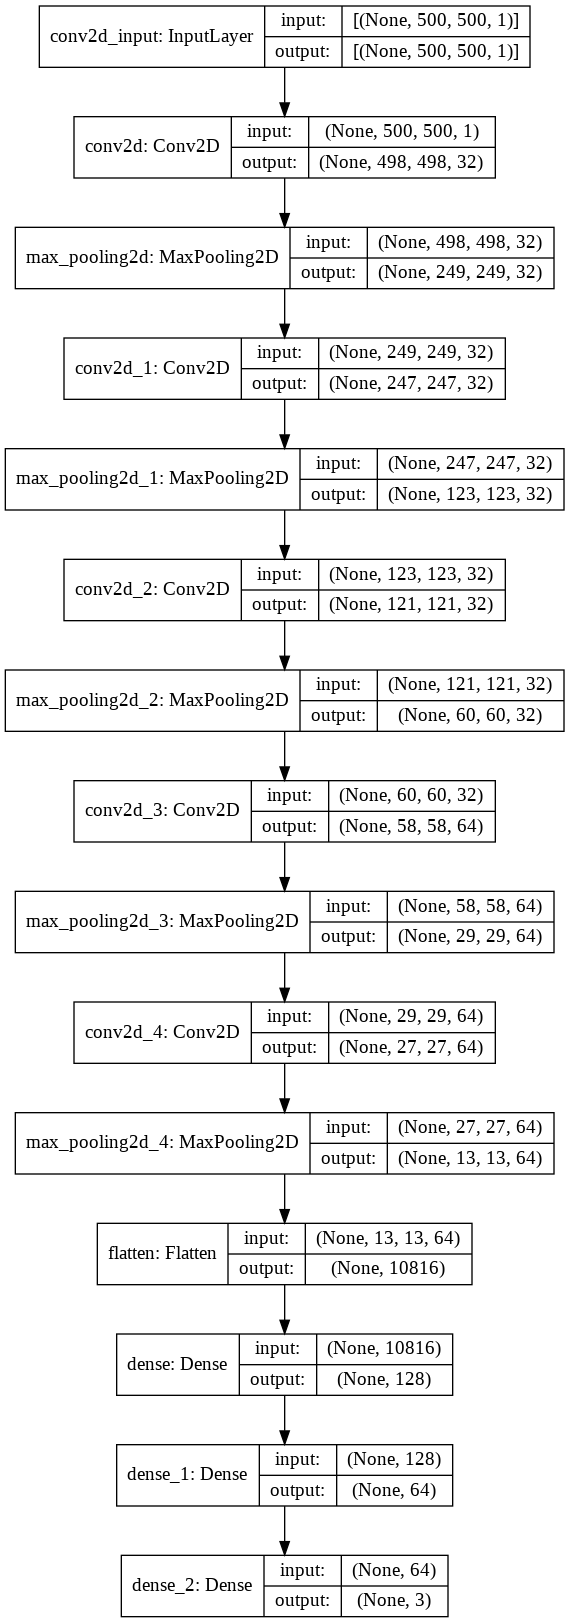

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 3.727536231884058, 1: 1.3543970510795156, 2: 0.501657889604057}


In [ ]:
cnn.fit(train,epochs=25, validation_data=test, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25
322/322 [==============================] - 4927s 15s/step - loss: 0.7689 - accuracy: 0.5875 - val_loss: 0.6801 - val_accuracy: 0.7430
Epoch 2/25
322/322 [==============================] - 217s 673ms/step - loss: 0.2175 - accuracy: 0.9063 - val_loss: 0.2495 - val_accuracy: 0.9154
Epoch 3/25
322/322 [==============================] - 217s 672ms/step - loss: 0.1933 - accuracy: 0.9183 - val_loss: 0.2137 - val_accuracy: 0.9363
Epoch 4/25
322/322 [==============================] - 217s 675ms/step - loss: 0.1590 - accuracy: 0.9340 - val_loss: 0.2193 - val_accuracy: 0.9293
Epoch 5/25
322/322 [==============================] - 219s 679ms/step - loss: 0.1569 - accuracy: 0.9301 - val_loss: 0.1674 - val_accuracy: 0.9472
Epoch 6/25
322/322 [==============================] - 216s 670ms/step - loss: 0.1148 - accuracy: 0.9523 - val_loss: 0.2129 - val_accuracy: 0.9371
Epoch 7/25
322/322 [==============================] - 214s 665ms/step - loss: 0.0819 - accuracy: 0.9623 - val_loss: 0.1553 - 

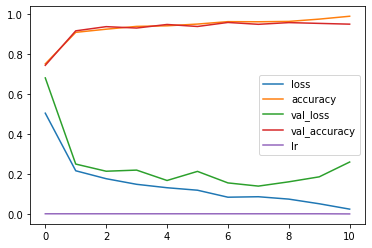

In [ ]:

pd.DataFrame(cnn.history.history).plot()

In [ ]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

81/81 [==============================] - 32s 388ms/step - loss: 0.1676 - accuracy: 0.9387
The testing accuracy is : 93.86646151542664 %


In [ ]:
preds = cnn.predict(test,verbose=1)


81/81 [==============================] - 41s 501ms/step


In [ ]:
print(preds)

[[9.9999952e-01 1.6159008e-07 4.0855022e-07]
 [9.9952817e-01 1.3159445e-07 4.7168121e-04]
 [9.9299943e-01 3.2968812e-03 3.7037581e-03]
 ...
 [9.9224788e-05 2.8050194e-02 9.7185057e-01]
 [1.8963050e-05 1.3884732e-01 8.6113369e-01]
 [4.1224994e-04 1.9821059e-03 9.9760556e-01]]


In [ ]:
pred = np.argmax(preds,1)
print(pred.shape)

(1288,)


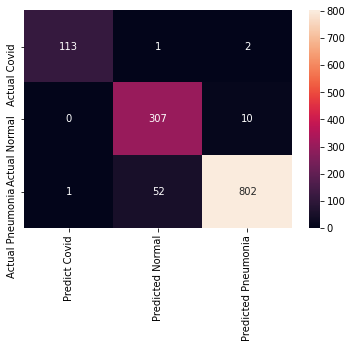

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test.classes, pred, labels=[0,1,2]),
                  index=["Actual Covid","Actual Normal", "Actual Pneumonia"],
                  columns=["Predict Covid","Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

322/322 [==============================] - 206s 639ms/step
(5144,)


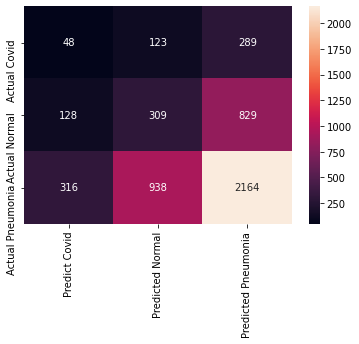

In [ ]:

# old one ***********************************************
 
# train_pred = cnn.predict(train,verbose=1)
# t_pred = np.argmax(train_pred,1) 
# print(t_pred.shape)

# cm = pd.DataFrame(data=confusion_matrix(train.classes, t_pred, labels=[0,1,2]),
#                   index=["Actual Covid","Actual Normal", "Actual Pneumonia"],
#                   columns=["Predict Covid","Predicted Normal", "Predicted Pneumonia"])
# import seaborn as sns
# sns.heatmap(cm,annot=True,fmt="d")

322/322 [==============================] - 169s 525ms/step
(5144,)


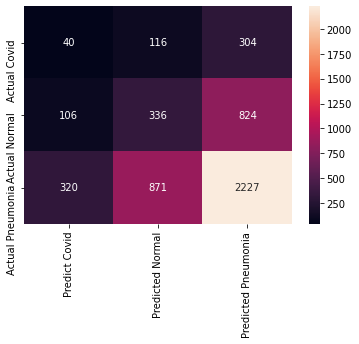

In [ ]:
train_pred = cnn.predict(train,verbose=1)
t_pred = np.argmax(train_pred,1) 
print(t_pred.shape)

cm = pd.DataFrame(data=confusion_matrix(train.classes, t_pred, labels=[0,1,2]),
                  index=["Actual Covid","Actual Normal", "Actual Pneumonia"],
                  columns=["Predict Covid","Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
cnn.save('/content/drive/MyDrive/augment_dataset/super_model.h5')

In [ ]:
image = "/content/drive/MyDrive/augment_dataset/Data/test/NORMAL/NORMAL(1269).jpg"

# image_path = tf.keras.utils.get_file('covid-19',origin = image)

img = tf.keras.preprocessing.image.load_img(
    image,target_size = (500,500), color_mode= 'grayscale'
)
image_array = tf.keras.preprocessing.image.img_to_array(img)
image_array = tf.expand_dims(image_array,0)

prediction  = cnn.predict(image_array)
print(np.argmax(prediction))

1


In [ ]:
image = "/content/drive/MyDrive/augment_dataset/Data/test/COVID19/COVID19(465).jpg"
img = tf.keras.preprocessing.image.load_img(
    image,target_size = (500,500), color_mode= 'grayscale'
)
image_array = tf.keras.preprocessing.image.img_to_array(img)
image_array = tf.expand_dims(image_array,0)

prediction  = cnn.predict(image_array)
print(np.argmax(prediction))

0


In [ ]:
image = "/content/drive/MyDrive/augment_dataset/Data/test/PNEUMONIA/PNEUMONIA(3425).jpg"
img = tf.keras.preprocessing.image.load_img(
    image,target_size = (500,500), color_mode= 'grayscale'
)
image_array = tf.keras.preprocessing.image.img_to_array(img)
image_array = tf.expand_dims(image_array,0)

prediction  = cnn.predict(image_array)
print(np.argmax(prediction))

2
